### Set parameters

In [184]:
type = "real_exp"
device = 'nano'
model = "densenet201"
date_label = "0107"

# Import

In [185]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
from matplotlib import patheffects
import os
import argparse
from datetime import datetime
from glob import glob
from itertools import product, groupby
from mpl_toolkits.mplot3d import Axes3D
import re

# Font & Color

##### TODO
- font download

In [186]:
# font = {'family': 'Tahoma'}
# font = {'family': 'Times New Roman'}

# plt.rc('font', **font)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
colors_fill = [None, "#54637C", "#587C86", "#5D928B","#65A68D", 
               "#71B88E", "#83C98F", "#9CD790", "#BBE394", 
               "#D9ED9D", "#F1F4B0", "#FEFAD3"]
grid_color = 'gainsboro'

In [187]:
def layerNum(model:str) -> int:
    if model == "densenet201" :
        return 306
    elif model == "resnet152" :
        return 206
    elif model == "enetb0" :
        return 136
    elif model == "csmobilenet-v2" :
        return 81
    elif model == "squeezenet" :
        return 50
    elif model == "yolov7" :
        return 143
    elif model == "yolov7-tiny" :
        return 99
    elif model == "yolov4" :
        return 162
    elif model == "yolov4-tiny" :
        return 38
    elif model == "resnet10" :
        return 17
    elif model == "yolov2-tiny" :
        return 16
    else :
        print("Unknown model: ", model)
        return 0

def maxCore(device:str) -> int:
    if device == "nano":
        return 4
    elif device == "super":
        return 4
    elif device == "orin":
        return 8
    else:
        print("Unknown device: ", device)
        return 0

### Options

In [188]:
save_formats = ['png', 'pdf', 'svg']
devices = ['nano', 'orin']
types = ["toy_simul", "real_simul", "real_exp"]
models = ['densenet201', 'resnet152', 'enetb0', 'csmobilenet-v2', 'squeezenet', 
          'yolov7', 'yolov7-tiny', 'yolov4', 'yolov4-tiny', 'resnet10', 'yolov2-tiny']

max_cores = maxCore(device)
if type not in types:
    print("Unknown type: ", type)
layer_num = layerNum(model)
if not os.path.exists(f"../../csv/{date_label}"):
    print(f"Invalid date: {date_label}")

In [189]:
for save_format in save_formats:
    directory_path = f'./{date_label}/{save_format}'
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"디렉터리 '{directory_path}' 생성 완료!")
    else:
        print(f"디렉터리 '{directory_path}'가 이미 존재합니다.")

디렉터리 './0107/png'가 이미 존재합니다.
디렉터리 './0107/pdf'가 이미 존재합니다.
디렉터리 './0107/svg'가 이미 존재합니다.


### Load csv & Dataframe 생성

3. real_exp

In [190]:
if type == 'real_exp':
    max_cores = maxCore(device)
    if type not in types:
        print("Unknown type: ", type)
    layer_num = layerNum(model)
    if not os.path.exists(f"../../csv/{date_label}"):
        print(f"Invalid date: {date_label}")

In [191]:
if type == 'real_exp':
    base_path = f"../../csv/{date_label}/gpu-accel/{model}/"

In [231]:
if type == 'real_exp':
    # 데이터를 수집할 데이터프레임을 초기화
    columns = ['glayer', 'end_glayer', 'throughput', 'frame_rate', 'execution_time', 'cycle_time', 
            'num_thread_data', 'num_thread', 'accel_gain', 'block_loss']
    data_list = []

    num_thread = max_cores
    path = os.path.join(base_path, f"{num_thread}thread")
    for filename in sorted(os.listdir(path)):
        if filename.endswith(".csv"):
            start_glayer = int(filename.split('_')[1])
            end_glayer = int(filename.split('_')[2].replace('.csv', '')) - start_glayer
            df = pd.read_csv(os.path.join(path, filename))
            task_num = len(df)
            start_preprocess_time = df["start_preprocess"].iloc[0]
            end_infer_time = df["end_postprocess"].iloc[-1]
            print(start_glayer, end_glayer)
            Throughput = task_num / (end_infer_time - start_preprocess_time) * 1000
            if(end_glayer == 0):
                infer_time_standard = df["e_infer"].mean() - df["waiting_gpu"].mean()
            acceleration_gain = infer_time_standard - (df["e_infer"].mean() - df["waiting_gpu"].mean())

            block_loss = df["waiting_gpu"].mean()
            
            avg_frame_rate = df["frame_rate"].mean()
            avg_execution_time = df["execution_time"].mean()
            avg_cycle_time = df["cycle_time"].mean()
            avg_num_thread_data = df["num_thread"].mean()
            
            # 데이터프레임에 데이터 추가
            data_list.append([start_glayer, end_glayer, Throughput, avg_frame_rate, 
                              avg_execution_time, avg_cycle_time, avg_num_thread_data, 
                              num_thread, acceleration_gain, block_loss])

# 데이터프레임 생성
data_df = pd.DataFrame(data_list, columns=columns)
data_df = data_df.pivot(index='glayer', columns='end_glayer')

frame_rate_df = data_df['frame_rate']
execution_time_df = data_df['execution_time']
cycle_time_df = data_df['cycle_time']

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0


KeyboardInterrupt: 

In [193]:
num_thread = max_cores
# 결과를 저장할 리스트 초기화
max_values = []

# 각 스레드 수에 대해 반복

if num_thread in data_df['frame_rate'].columns:
    # frame_rate의 최대값 찾기
    max_throughput = np.max(data_df['throughput'])
    # 최대 frame_rate의 인덱스 찾기
    max_index=np.unravel_index(np.nanargmax(data_df['throughput']), data_df['throughput'].shape)    
    # 해당 인덱스의 execution_time 가져오기
    corresponding_execution_time = data_df['execution_time'].loc[max_index]

    # 결과 저장
    max_values.append({
        'X_max': max_index[0],
        'Y_max': max_index[1],
        'max_throughput': max_throughput,
        'execution_time_at_max_fr': corresponding_execution_time
    })

# 결과 출력
print("Point for Max Frame rate")
for result in max_values:
    print(f"X_max: {result['X_max']}, Y_max: {result['Y_max']}, Max Throughput: {result['max_throughput']:.2f}, Execution Time: {result['execution_time_at_max_fr']:.2f}")

Point for Max Frame rate
X_max: 0, Y_max: 195, Max Throughput: 24.21, Execution Time: 158.93


In [194]:
# 결과를 저장할 리스트 초기화
cross_points = []

# 각 스레드 수와 그 다음 스레드 수 비교
for num_thread in range(max_cores):
    current_thread_frame_rates = data_df['frame_rate'][num_thread]
    next_thread_frame_rates = data_df['frame_rate'][num_thread + 1]
    current_thread_execution_time = data_df['execution_time'][num_thread]
    next_thread_execution_time = data_df['execution_time'][num_thread + 1]
    
    # glayer를 순회하면서 현재 스레드의 frame_rate가 다음 스레드의 frame_rate를 넘는 첫 번째 지점 찾기
    for glayer in current_thread_frame_rates.index:
        if current_thread_frame_rates[glayer] >= next_thread_frame_rates[glayer]:
            cross_points.append({
                'num_thread': num_thread,
                'glayer': glayer,
                'current_frame_rate': current_thread_frame_rates[glayer],
                'next_frame_rate': next_thread_frame_rates[glayer],
                'current_execution_time': current_thread_execution_time[glayer],
                'next_execution_time': next_thread_execution_time[glayer]
            })
            break  # 첫 번째 조건 충족 지점에서 루프 종료

# 결과 출력
for point in cross_points:
    print(f"Thread {point['num_thread']} exceeds Thread {point['num_thread']+1} at Glayer {point['glayer']}:")
    print(f"  Thread {point['num_thread']}: {point['current_frame_rate']:.2f} fps, Thread {point['num_thread']+1}: {point['next_frame_rate']:.2f} fps")
    print(f"  Thread {point['num_thread']}: {point['current_execution_time']:.2f} ms, Thread {point['num_thread']+1}: {point['next_execution_time']:.2f} ms")

Thread 0 exceeds Thread 1 at Glayer 0:
  Thread 0: 61825.43 fps, Thread 1: 318.35 fps
  Thread 0: 805.62 ms, Thread 1: 776.43 ms
Thread 1 exceeds Thread 2 at Glayer 8:
  Thread 1: 570.03 fps, Thread 2: 161.27 fps
  Thread 1: 790.55 ms, Thread 2: 761.94 ms
Thread 2 exceeds Thread 3 at Glayer 0:
  Thread 2: 913.05 fps, Thread 3: 369.87 fps
  Thread 2: 772.79 ms, Thread 3: 769.95 ms
Thread 3 exceeds Thread 4 at Glayer 16:
  Thread 3: 222.33 fps, Thread 4: 169.75 fps
  Thread 3: 754.99 ms, Thread 4: 754.99 ms


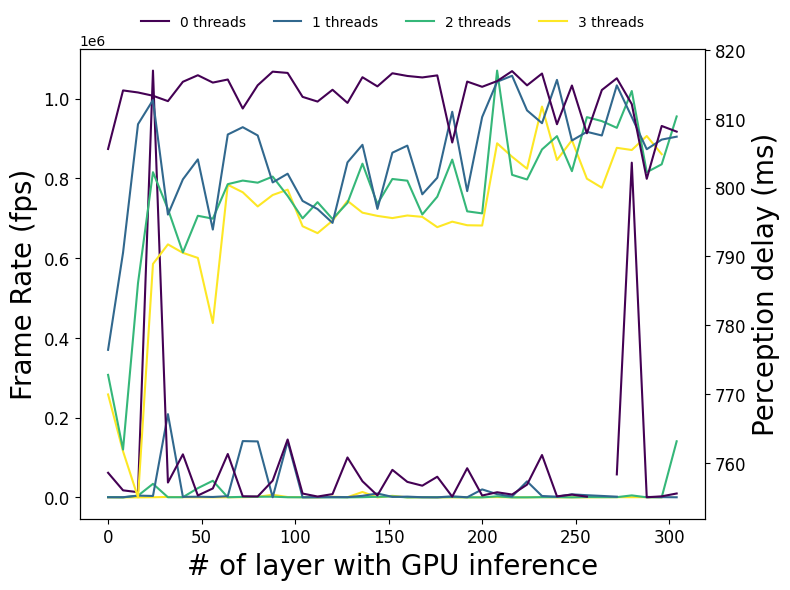

In [195]:
# Set up the plot
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
ax3 = ax1.twinx()

colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

# 각 스레드에 대한 데이터 플롯
for num_thread in range(max_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        ax3.plot(data_df.index, data_df[('execution_time', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        # if (num_thread == 1) or (num_thread == 2) or (num_thread == max_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=-num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=-num_thread)


ax1.set_xlabel('# of layer with GPU inference', size=20)
ax1.set_ylabel("Frame Rate (fps)", size=20)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, frameon=False)

ax3.set_ylabel("Perception delay (ms)", size=20)
# ax2.set_xlabel('# of layer with GPU inference', size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
ax3.tick_params(axis='both', labelsize=12)
# ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()


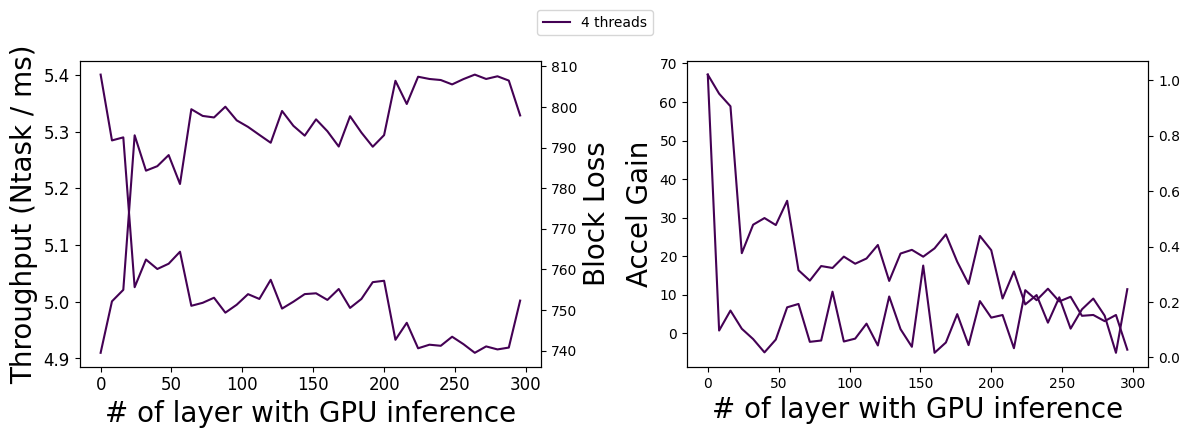

In [196]:
# Set up the plot
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4))
ax2 = ax1.twinx()
ax4 = ax3.twinx()
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(4, 5):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        ax1.plot(data_df.index, data_df[('throughput', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        ax2.plot(data_df.index, data_df[('execution_time', num_thread)], color=color, zorder = num_thread)
        ax3.plot(data_df.index, data_df[('accel_gain', num_thread)], color=color, zorder = num_thread)
        ax4.plot(data_df.index, data_df[('block_loss', num_thread)], color=color, zorder = num_thread)
        # ax1.axvline(x=max_values[num_thread - 1]['glayer'], color='red', zorder = num_thread, linestyle='--', alpha=0.3)
        # ax3.axvline(x=max_values[num_thread - 1]['glayer'], color='red', zorder = num_thread, linestyle='--', alpha=0.3)

        # if (num_thread == 1) or (num_thread == 2) or (num_thread == max_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


# ax1.set_xlabel('# of layer with GPU inference', size=20)
# ax1.set_ylabel("Frame Rate (fps)", size=20)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

ax1.set_ylabel("Throughput (Ntask / ms)", size=20)
ax2.set_ylabel("Delay Time (ms)", size = 20)
ax3.set_ylabel("Accel Gain", size=20)
ax2.set_ylabel("Block Loss", size = 20)
ax1.set_xlabel('# of layer with GPU inference', size=20)
ax3.set_xlabel('# of layer with GPU inference', size=20)

# ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
plt.show()


24.209835564243274


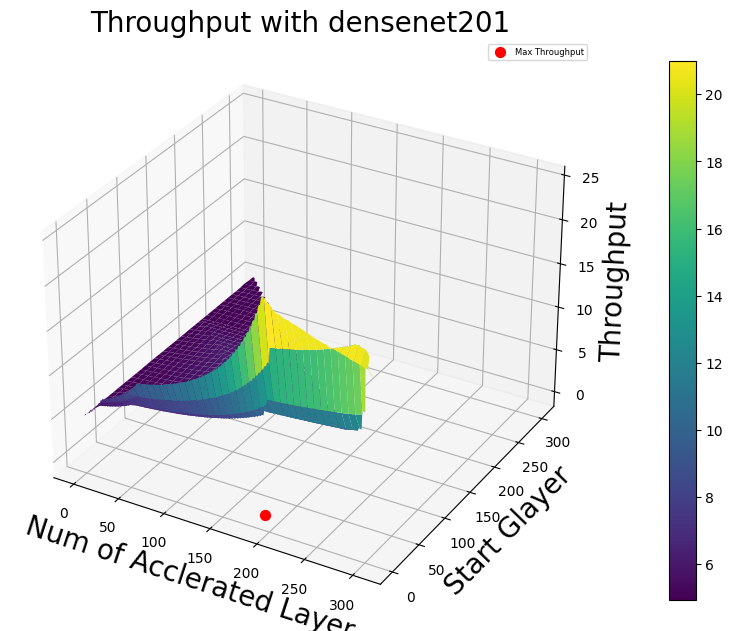

In [197]:
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
# Y = np.arange(0, data_df.index[-1] + 1)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('throughput')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
print(list(max_values[0].values())[2])
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Throughput", size=20)
ax5.view_init(elev=30, azim=300)
ax5.set_title(f"Throughput with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/3D-Throughput-{device}-{type}-{model}-{date_label}.{save_format}')

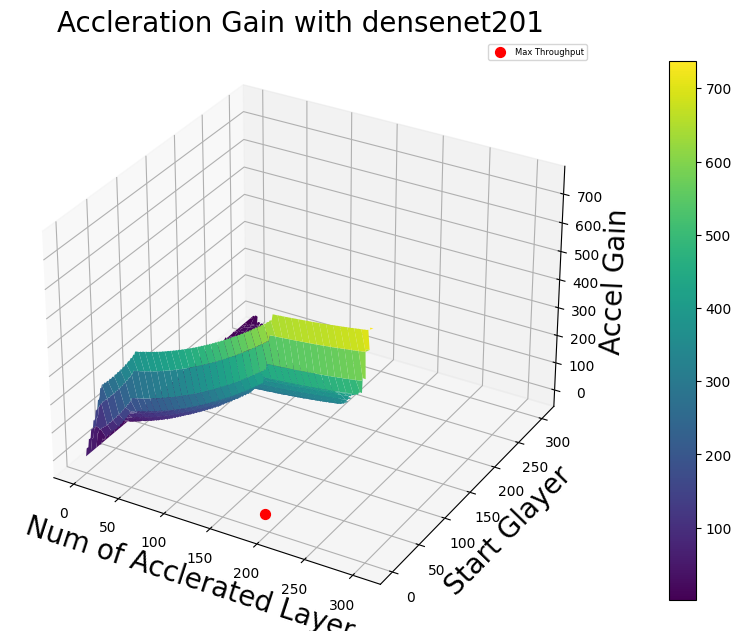

In [198]:
#print(np.max(data_df[('accel_gain')]))
#print(data_df[('accel_gain')].max(axis=1), data_df[('accel_gain')].idxmax(axis=1))
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('accel_gain')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Accel Gain", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Accleration Gain with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/3D-AccelGain-{device}-{type}-{model}-{date_label}.{save_format}')

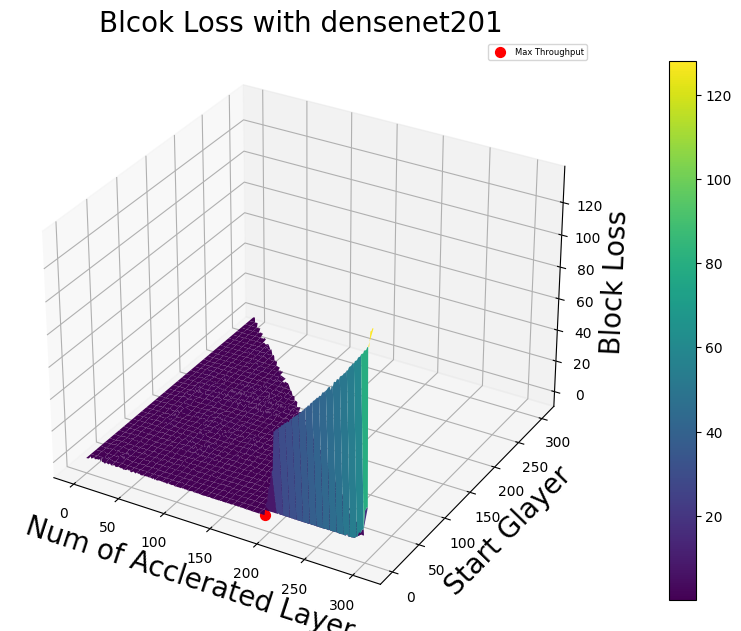

In [199]:
#print(np.max(data_df[('block_loss')]))
#print(data_df[('block_loss')].max(axis=1), data_df[('block_loss')].idxmax(axis=1))
#print(data_df[('block_loss')])
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('block_loss')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Block Loss", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Blcok Loss with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/3D-BlockLoss-{device}-{type}-{model}-{date_label}.{save_format}')

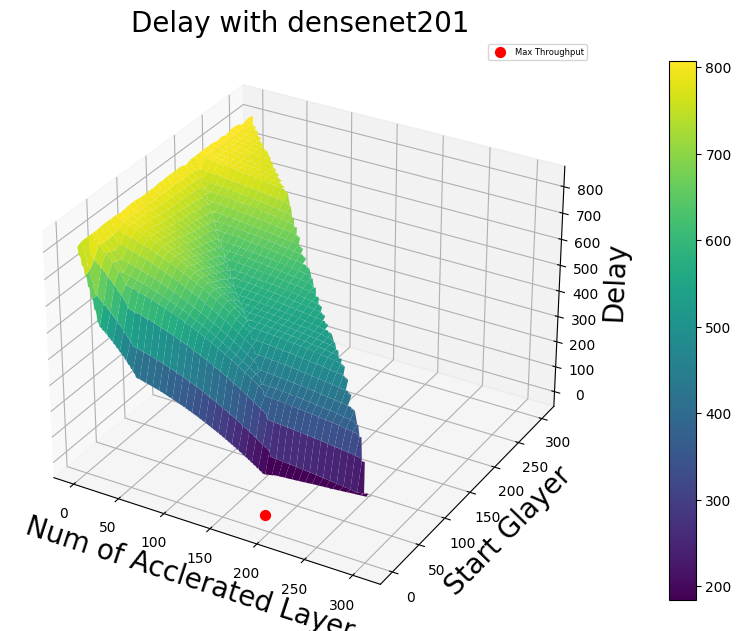

In [200]:
#print(data_df[('execution_time')])
#print(np.max(data_df[('execution_time')]))
#print(data_df[('execution_time')].max(axis=1), data_df[('execution_time')].idxmax(axis=1))

#print(np.min(data_df[('execution_time')]))
#print(data_df[('execution_time')].min(axis=1), data_df[('execution_time')].idxmin(axis=1))
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('execution_time')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Delay", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Delay with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/3D-Delay-{device}-{type}-{model}-{date_label}.{save_format}')

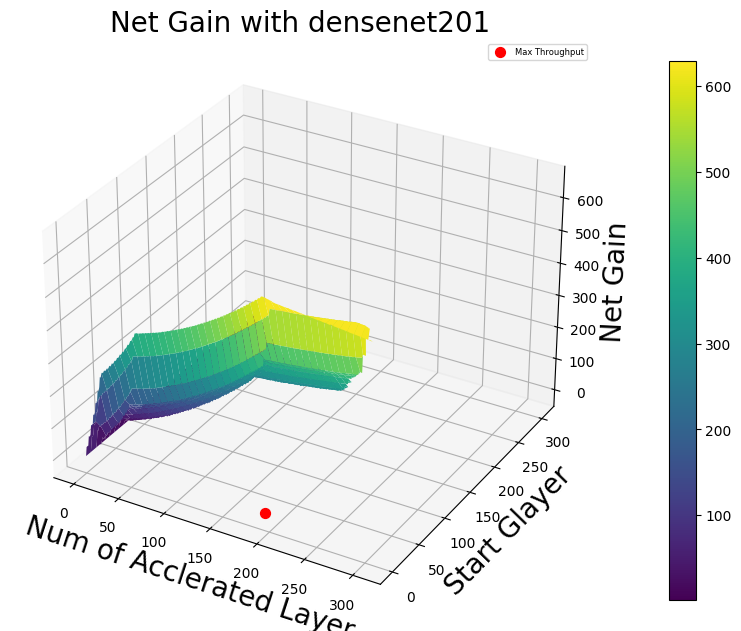

In [201]:
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('accel_gain')] - data_df[('block_loss')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Net Gain", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Net Gain with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/3D-NetGain-{device}-{type}-{model}-{date_label}.{save_format}')

end_glayer  0          1          2          3          4          5    \
glayer                                                                   
0           0.0  29.288158  33.048026  35.879474  67.110789  67.616974   

end_glayer     6           7           8           9    ...         297  \
glayer                                                  ...               
0           72.945  102.744868  101.895921  108.990789  ...  729.038158   

end_glayer         298         299         300         301         302  \
glayer                                                                   
0           729.544868  729.561447  730.755132  731.378947  731.485921   

end_glayer         303         304         305         306  
glayer                                                      
0           740.987763  740.904211  740.383158  740.346447  

[1 rows x 307 columns]


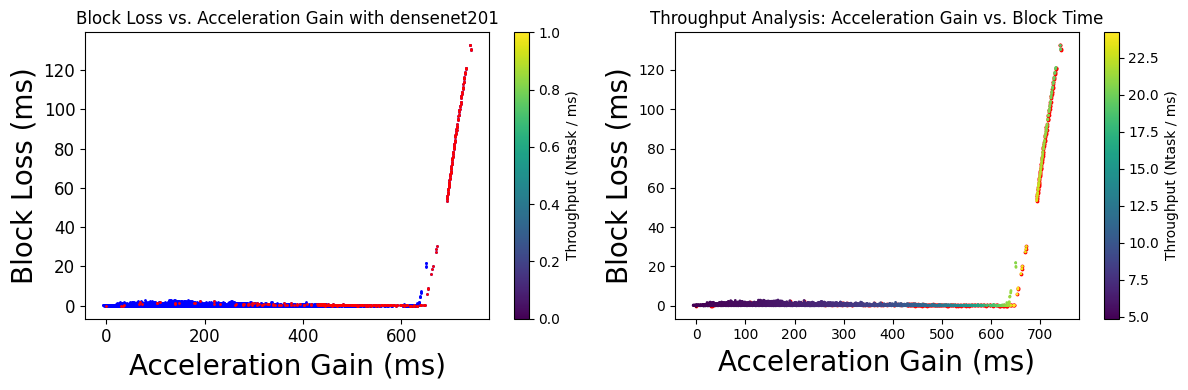

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()

color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
    #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
#scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', zorder = 1, s=1)
ax2.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = num_thread, s=3)
scatter2 = ax2.scatter(data_df[('accel_gain')], data_df[('block_loss')], c=throughput_flat, zorder = num_thread, s=1)
print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
    # if (num_thread == 1) or (num_thread == 2) or (num_thread == max_cores):
    #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
    # else:
    #     exceed_num = cross_points[num_thread - 3]['glayer']
    #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


ax1.set_ylabel("Block Loss (ms)", size=20)
ax2.set_ylabel("Block Loss (ms)", size=20)
ax2.set_xlabel("Acceleration Gain (ms)", size = 20)
ax1.set_xlabel('Acceleration Gain (ms)', size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)
ax1.set_title(f"Block Loss vs. Acceleration Gain with {model}")
ax2.set_title("Throughput Analysis: Acceleration Gain vs. Block Time")
ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Throughput (Ntask / ms)")

for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/dots-hitmap-BlockLoss-AccelGain-{device}-{type}-{model}-{date_label}.{save_format}')

end_glayer  0          1          2          3          4          5    \
glayer                                                                   
0           0.0  29.288158  33.048026  35.879474  67.110789  67.616974   

end_glayer     6           7           8           9    ...         297  \
glayer                                                  ...               
0           72.945  102.744868  101.895921  108.990789  ...  729.038158   

end_glayer         298         299         300         301         302  \
glayer                                                                   
0           729.544868  729.561447  730.755132  731.378947  731.485921   

end_glayer         303         304         305         306  
glayer                                                      
0           740.987763  740.904211  740.383158  740.346447  

[1 rows x 307 columns]


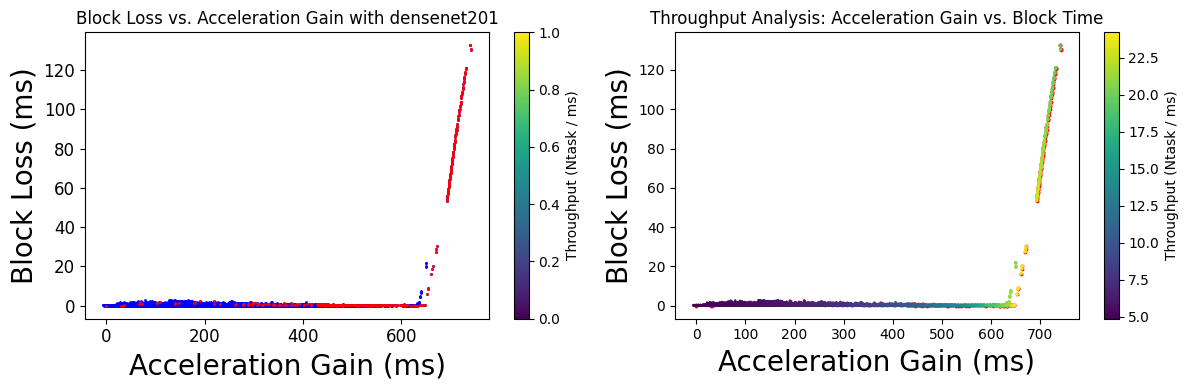

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()
bubble_size = throughput_flat * 0.1
color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
    #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
#scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', zorder = 1, s=1)
ax2.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = num_thread, s=3)
scatter2 = ax2.scatter(data_df[('accel_gain')], data_df[('block_loss')], c=throughput_flat, zorder = num_thread, s=bubble_size)
print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
    # if (num_thread == 1) or (num_thread == 2) or (num_thread == max_cores):
    #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
    # else:
    #     exceed_num = cross_points[num_thread - 3]['glayer']
    #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


ax1.set_ylabel("Block Loss (ms)", size=20)
ax2.set_ylabel("Block Loss (ms)", size=20)
ax2.set_xlabel("Acceleration Gain (ms)", size = 20)
ax1.set_xlabel('Acceleration Gain (ms)', size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)
ax1.set_title(f"Block Loss vs. Acceleration Gain with {model}")
ax2.set_title("Throughput Analysis: Acceleration Gain vs. Block Time")
ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Throughput (Ntask / ms)")

for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/dots-hitmap-BlockLoss-AccelGain_(2)-{device}-{type}-{model}-{date_label}.{save_format}')

end_glayer  0          1          2          3          4          5    \
glayer                                                                   
0           0.0  29.288158  33.048026  35.879474  67.110789  67.616974   

end_glayer     6           7           8           9    ...         297  \
glayer                                                  ...               
0           72.945  102.744868  101.895921  108.990789  ...  729.038158   

end_glayer         298         299         300         301         302  \
glayer                                                                   
0           729.544868  729.561447  730.755132  731.378947  731.485921   

end_glayer         303         304         305         306  
glayer                                                      
0           740.987763  740.904211  740.383158  740.346447  

[1 rows x 307 columns]


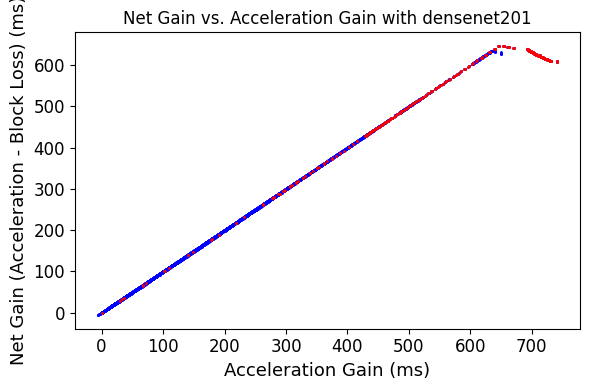

In [204]:
fig, ax1 = plt.subplots(figsize=(6, 4))
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()

color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
 
ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)] - data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('accel_gain')] - data_df[('block_loss')], color='blue', zorder = 1, s=1)

print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
 
ax1.set_ylabel("Net Gain (Acceleration - Block Loss) (ms)", size=13)
ax1.set_xlabel('Acceleration Gain (ms)', size=13)
# ax2.set_ylabel('Minimum # of thread', size=20)
ax1.set_title(f"Net Gain vs. Acceleration Gain with {model}")
ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()

for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/dots-color-NetGain-AccelGain-{device}-{type}-{model}-{date_label}.{save_format}')

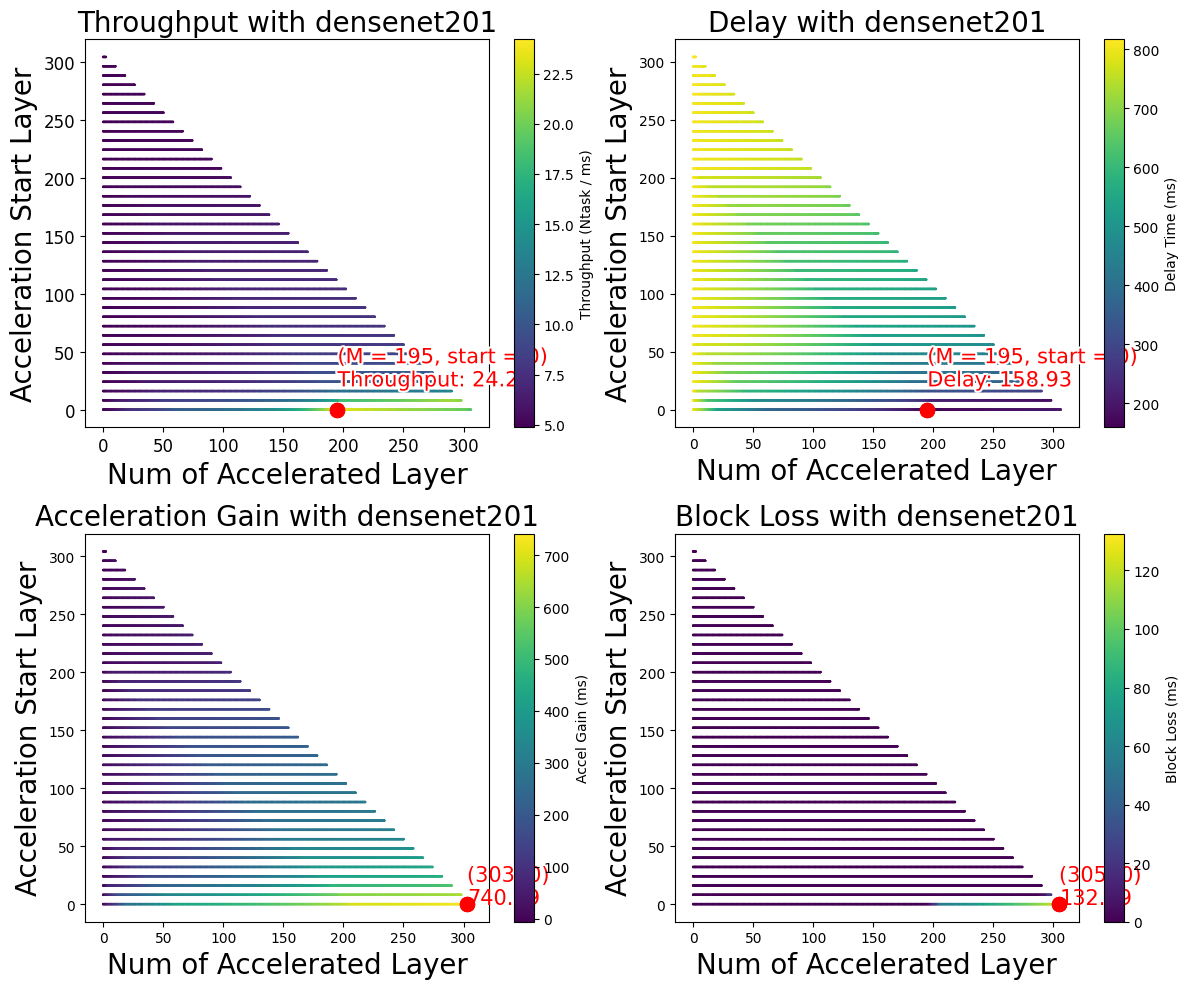

In [278]:
# Set up the plot
x=data_df.columns.get_level_values('end_glayer').unique()
y=data_df.index.values
X, Y = np.meshgrid(x, y)
x_flat = X.flatten()
y_flat = Y.flatten()

throughput_flat = data_df['throughput'].values.flatten()
delay_flat = data_df['execution_time'].values.flatten()
accel_gain_flat = data_df['accel_gain'].values.flatten()
block_loss_flat = data_df['block_loss'].values.flatten()

fig, ([ax1, ax2], [ax3, ax4])  = plt.subplots(2, 2, figsize=(12, 10))  # plt.subplots()로 수정
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(max_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #ax1.scatter(data_df.index, data_df[('throughput'), a], label=f"{num_thread} threads", color=color, zorder = num_thread, s=1)
        scatter1 = ax1.scatter(x_flat, y_flat, c=throughput_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=0.5)
        scatter2 = ax2.scatter(x_flat, y_flat, c=delay_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=0.5)
        scatter3 = ax3.scatter(x_flat, y_flat, c=accel_gain_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=0.5)
        scatter4 = ax4.scatter(x_flat, y_flat, c=block_loss_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=0.5)
        max_throughput_idx = np.nanargmax(throughput_flat)
        ax1.scatter(x_flat[max_throughput_idx], y_flat[max_throughput_idx], color='red', marker='o', s=100, zorder = 100)
        max_delay_idx = np.nanargmin(delay_flat)
        ax2.scatter(x_flat[max_delay_idx], y_flat[max_delay_idx], color='red', marker='o', s=100, zorder = 100)
        max_accel_idx = np.nanargmax(accel_gain_flat)
        ax3.scatter(x_flat[max_accel_idx], y_flat[max_accel_idx], color='red', marker='o', s=100, zorder = 100)
        max_block_idx = np.nanargmax(block_loss_flat)
        ax4.scatter(x_flat[max_block_idx], y_flat[max_block_idx], color='red', marker='o', s=100, zorder = 100)
        # if (num_thread == 1) or (num_thread == 2) or (num_thread == max_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


# ax1.set_xlabel('# of layer with GPU inference', size=20)
# ax1.set_ylabel("Frame Rate (fps)", size=20)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

ax1.set_ylabel("Acceleration Start Layer", size=20)
ax2.set_ylabel("Acceleration Start Layer", size = 20)
ax3.set_ylabel("Acceleration Start Layer", size=20)
ax4.set_ylabel("Acceleration Start Layer", size = 20)
ax1.set_xlabel('Num of Accelerated Layer', size=20)
ax2.set_xlabel('Num of Accelerated Layer', size=20)
ax3.set_xlabel('Num of Accelerated Layer', size=20)
ax4.set_xlabel('Num of Accelerated Layer', size=20)
ax1.set_title(f"Throughput with {model}", size=20)
ax2.set_title(f"Delay with {model}", size=20)
ax3.set_title(f"Acceleration Gain with {model}", size=20)
ax4.set_title(f"Block Loss with {model}", size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Delay Time (ms)")
fig.colorbar(scatter3, label="Accel Gain (ms)")
fig.colorbar(scatter4, label="Block Loss (ms)")
ax1.text(x_flat[max_throughput_idx], y_flat[max_throughput_idx]+20, f"(M = {x_flat[max_throughput_idx]}, start = {y_flat[max_throughput_idx]})\nThroughput: {throughput_flat[max_throughput_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])
ax2.text(x_flat[max_delay_idx], y_flat[max_delay_idx]+20, f"(M = {x_flat[max_delay_idx]}, start = {y_flat[max_delay_idx]})\nDelay: {delay_flat[max_delay_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])
ax3.text(x_flat[max_accel_idx], y_flat[max_accel_idx], f"({x_flat[max_accel_idx]}, {y_flat[max_accel_idx]})\n{accel_gain_flat[max_accel_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left')
ax4.text(x_flat[max_block_idx], y_flat[max_block_idx], f"({x_flat[max_block_idx]}, {y_flat[max_block_idx]})\n{block_loss_flat[max_block_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left')

for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/2D-hitmaps_graphs-{device}-{type}-{model}-{date_label}.{save_format}')

(11973,)


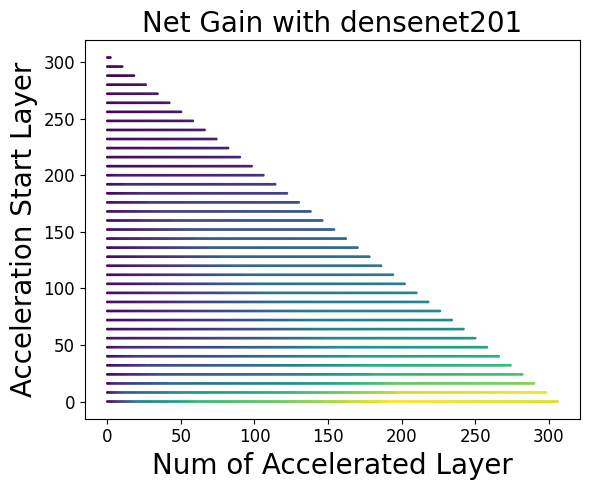

In [279]:
# Set up the plot
x=data_df.columns.get_level_values('end_glayer').unique()
y=data_df.index.values
# print(x)
# print(y)
X, Y = np.meshgrid(x, y)
x_flat = X.flatten()
y_flat = Y.flatten()

netgain_flat = data_df['accel_gain'].values.flatten() - data_df['block_loss'].values.flatten()
print(netgain_flat.shape)
fig, ax1  = plt.subplots( figsize=(6, 5))  # plt.subplots()로 수정
colors = plt.cm.viridis(np.linspace(0, 1, max_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(4,5):
    if num_thread in data_df.columns.levels[1]:
        ax1.scatter(x_flat, y_flat, c=netgain_flat, label=f"{num_thread} threads", zorder = num_thread, s=1) # type: ignore
        # scatter1 = ax1.scatter(data_df.index, data_df[('accel_gain', num_thread)].values - data_df[('block_loss', num_thread)].values, label=f"{num_thread} threads", zorder = num_thread, s=1) # type: ignore
        # scatter1 = ax1.scatter(x_flat, y_flat, c=netgain_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=0.5)
        max_throughput_idx = np.nanargmax(netgain_flat)
        # ax1.scatter(x_flat[max_throughput_idx], y_flat[max_throughput_idx], color='red', marker='o', s=100, zorder = 100)
ax1.set_ylabel("Acceleration Start Layer", size=20)
ax1.set_xlabel('Num of Accelerated Layer', size=20)
ax1.set_title(f"Net Gain with {model}", size=20)
ax1.tick_params(axis='both', labelsize=12)

plt.tight_layout()
fig.colorbar(scatter1, label="Net Gain")

# ax1.text(x_flat[max_throughput_idx], y_flat[max_throughput_idx]+20, f"(M = {x_flat[max_throughput_idx]}, start = {y_flat[max_throughput_idx]})\nNet Gain: {throughput_flat[max_throughput_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])
for save_format in save_formats:
    plt.savefig(f'./{date_label}/{save_format}/2D_hitmap-NetGain-{device}-{type}-{model}-{date_label}.{save_format}')

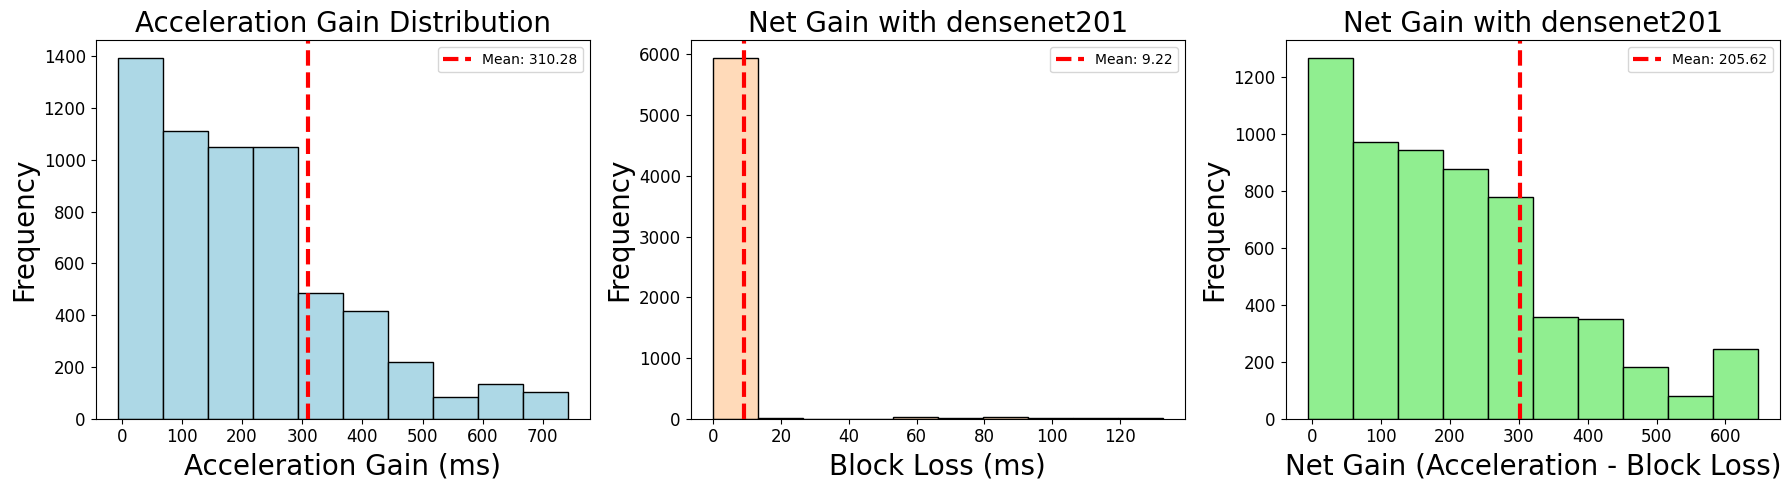

In [119]:
# Set up the plot
accel_gain_data = data_df['accel_gain']
block_loss_data = data_df['block_loss']
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(18, 5))  # plt.subplots()로 수정
# 각 스레드에 대한 데이터 플롯
ax1.hist(accel_gain_data.values.flatten(), bins=10, color='lightblue', edgecolor='black')
ax1.set_xlabel("Acceleration Gain (ms)", size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_title("Acceleration Gain Distribution", size=20)
ax1.tick_params(axis='both', labelsize=12)
ax1.axvline(x=data_df['accel_gain'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(data_df['accel_gain'].mean().mean(), 2)}")  # x=2.5 위치에 점선 추가

ax2.hist(block_loss_data.values.flatten(), bins=10, color='peachpuff', edgecolor='black')
ax2.set_xlabel("Block Loss (ms)", size=20)
ax2.set_ylabel('Frequency', size=20)
ax2.set_title(f"Net Gain with {model}", size=20)
ax2.tick_params(axis='both', labelsize=12)
ax2.axvline(x=data_df['block_loss'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(data_df['block_loss'].mean().mean(), 2)}")  # x=2.5 위치에 점선 추가

net_gain_data = accel_gain_data.values.flatten() - block_loss_data.values.flatten()
ax3.hist(net_gain_data, bins=10, color='lightgreen', edgecolor='black')
ax3.set_xlabel("Net Gain (Acceleration - Block Loss)", size=20)
ax3.set_ylabel('Frequency', size=20)
ax3.set_title(f"Net Gain with {model}", size=20)
ax3.tick_params(axis='both', labelsize=12)
ax3.axvline(x=data_df['accel_gain'].mean().mean() - data_df['block_loss'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(np.nanmean(net_gain_data), 2)}")  # x=2.5 위치에 점선 추가

plt.tight_layout()
fig.colorbar(scatter1, label="Net Gain")
ax1.legend()
ax2.legend()
ax3.legend()

plt.show()
